# Ted Talk Analysis
## Team : Priyam Saxena, Sanjana Athreya, Vishv Brahmbhatt, Harsh Patel, Parth Hingu

TED is a  nonpartisan nonprofit devoted to spreading ideas, usually in the form of short, powerful talks (18 minutes or less). TED began in 1984 as a conference where Technology, Entertainment and Design converged, and today covers almost all topics — from science to business to global issues — in more than 100 languages.

Given its recent popularity, there are numerous events being organised for TED talk and conferences and there are more than 3000 TED Talks currently available on internet. 

A detailed analysis of the talks would be a lot helpful to the current speakers, potential speakers and to all the viewers interested in listening to some quality talks. 

Our project aims at :
- Providing detailed analysis on which TED Talks have larger number of views, which talks create maximum debate.
- Insights on the trending topics by analysing which topic and which tags get the maximum views, comments and ratings.
- Building a predictive model to analyse which video will get more views.

The dataset that has been used for performing exploratory and predictive data analysis has been web scrapped from the official TED Talks website, www.ted.com

The analysis will be performed using two data sets. The main dataset contains all the details of the TED Talks along with its speakers. 
The other data set will contain the content of the speech in textual format. 

In [1]:
import pandas as pd
import numpy as np
import warnings
import calendar
import collections
import matplotlib.pyplot as plt
import seaborn as sb
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('ted_main.csv')
df.head()

,comments,description,duration,event,film_date,languages,main_speaker,name,num_speaker,published_date,ratings,related_talks,speaker_occupation,tags,title,url,views
0,4553,Sir Ken Robinson makes an entertaining and pro...,1164,TED2006,1140825600,60,Ken Robinson,Ken Robinson: Do schools kill creativity?,1,1151367060,"[{'id': 7, 'name': 'Funny', 'count': 19645}, {...","[{'id': 865, 'hero': 'https://pe.tedcdn.com/im...",Author/educator,"['children', 'creativity', 'culture', 'dance',...",Do schools kill creativity?,https://www.ted.com/talks/ken_robinson_says_sc...,47227110
1,265,With the same humor and humanity he exuded in ...,977,TED2006,1140825600,43,Al Gore,Al Gore: Averting the climate crisis,1,1151367060,"[{'id': 7, 'name': 'Funny', 'count': 544}, {'i...","[{'id': 243, 'hero': 'https://pe.tedcdn.com/im...",Climate advocate,"['alternative energy', 'cars', 'climate change...",Averting the climate crisis,https://www.ted.com/talks/al_gore_on_averting_...,3200520
2,124,New York Times columnist David Pogue takes aim...,1286,TED2006,1140739200,26,David Pogue,David Pogue: Simplicity sells,1,1151367060,"[{'id': 7, 'name': 'Funny', 'count': 964}, {'i...","[{'id': 1725, 'hero': 'https://pe.tedcdn.com/i...",Technology columnist,"['computers', 'entertainment', 'interface desi...",Simplicity sells,https://www.ted.com/talks/david_pogue_says_sim...,1636292
3,200,"In an emotionally charged talk, MacArthur-winn...",1116,TED2006,1140912000,35,Majora Carter,Majora Carter: Greening the ghetto,1,1151367060,"[{'id': 3, 'name': 'Courageous', 'count': 760}...","[{'id': 1041, 'hero': 'https://pe.tedcdn.com/i...",Activist for environmental justice,"['MacArthur grant', 'activism', 'business', 'c...",Greening the ghetto,https://www.ted.com/talks/majora_carter_s_tale...,1697550
4,593,You've never seen data presented like this. Wi...,1190,TED2006,1140566400,48,Hans Rosling,Hans Rosling: The best stats you've ever seen,1,1151440680,"[{'id': 9, 'name': 'Ingenious', 'count': 3202}...","[{'id': 2056, 'hero': 'https://pe.tedcdn.com/i...",Global health expert; data visionary,"['Africa', 'Asia', 'Google', 'demo', 'economic...",The best stats you've ever seen,https://www.ted.com/talks/hans_rosling_shows_t...,12005869


In [3]:
df1 = pd.read_csv('transcripts.csv')
df1.head()

,transcript,url
0,Good morning. How are you?(Laughter)It's been ...,https://www.ted.com/talks/ken_robinson_says_sc...
1,"Thank you so much, Chris. And it's truly a gre...",https://www.ted.com/talks/al_gore_on_averting_...
2,"(Music: ""The Sound of Silence,"" Simon & Garfun...",https://www.ted.com/talks/david_pogue_says_sim...
3,If you're here today — and I'm very happy that...,https://www.ted.com/talks/majora_carter_s_tale...
4,"About 10 years ago, I took on the task to teac...",https://www.ted.com/talks/hans_rosling_shows_t...


As the data has been obtained directly from a website, that are high chances of values which can lead to errors or obstacles in perforing analysis. 
In order to remove such values we will, as an initial step, perform data cleaning on the dataset. 

# Data Cleaning

Data cleaning is a process of removing or correcting inaccurate records from our dataset which can create hurdles in performing data analysis and can lead us to inaccurate predictions. 

Usually large datasets tend to have missing values. Missing values can give us errors or abnormal analysis and can also effect the other accurate records in the dataset. Hence, it is necessary to remove or modify the missing values. 

We will now check for missing values in both our datasets. 

In [4]:
list(df)


['comments',
 'description',
 'duration',
 'event',
 'film_date',
 'languages',
 'main_speaker',
 'name',
 'num_speaker',
 'published_date',
 'ratings',
 'related_talks',
 'speaker_occupation',
 'tags',
 'title',
 'url',
 'views']

As shown above, there are 6 values missing in the speaker occupation column of the main dataset. 6 missing values cannot make any disruptions in performing analysis and hence, without making any changes, we will ignore them. 

In [5]:
df1.isnull().sum() #checking null values for the transcript dataset

transcript    0
url           0
dtype: int64

As shown above, the transcript data set has no missing values. 

We will now work on the dates of our dataset. All the recorded dates in our dataset are in UNIX format. Hence, we need to convert them into redable format. 

In [6]:
df['film_date'] = pd.to_datetime(df['film_date'], unit = 's')
df['published_date'] = pd.to_datetime(df['published_date'], unit = 's')
df.head(2)

,comments,description,duration,event,film_date,languages,main_speaker,name,num_speaker,published_date,ratings,related_talks,speaker_occupation,tags,title,url,views
0,4553,Sir Ken Robinson makes an entertaining and pro...,1164,TED2006,2006-02-25,60,Ken Robinson,Ken Robinson: Do schools kill creativity?,1,2006-06-27 00:11:00,"[{'id': 7, 'name': 'Funny', 'count': 19645}, {...","[{'id': 865, 'hero': 'https://pe.tedcdn.com/im...",Author/educator,"['children', 'creativity', 'culture', 'dance',...",Do schools kill creativity?,https://www.ted.com/talks/ken_robinson_says_sc...,47227110
1,265,With the same humor and humanity he exuded in ...,977,TED2006,2006-02-25,43,Al Gore,Al Gore: Averting the climate crisis,1,2006-06-27 00:11:00,"[{'id': 7, 'name': 'Funny', 'count': 544}, {'i...","[{'id': 243, 'hero': 'https://pe.tedcdn.com/im...",Climate advocate,"['alternative energy', 'cars', 'climate change...",Averting the climate crisis,https://www.ted.com/talks/al_gore_on_averting_...,3200520


Also, the durations recorded in our data set for various talks are in seconds format. To elucidate our analysis, we will convert them to minutes. 

In [7]:
df['duration']=df['duration']/60
df.head()

,comments,description,duration,event,film_date,languages,main_speaker,name,num_speaker,published_date,ratings,related_talks,speaker_occupation,tags,title,url,views
0,4553,Sir Ken Robinson makes an entertaining and pro...,19.400000,TED2006,2006-02-25,60,Ken Robinson,Ken Robinson: Do schools kill creativity?,1,2006-06-27 00:11:00,"[{'id': 7, 'name': 'Funny', 'count': 19645}, {...","[{'id': 865, 'hero': 'https://pe.tedcdn.com/im...",Author/educator,"['children', 'creativity', 'culture', 'dance',...",Do schools kill creativity?,https://www.ted.com/talks/ken_robinson_says_sc...,47227110
1,265,With the same humor and humanity he exuded in ...,16.283333,TED2006,2006-02-25,43,Al Gore,Al Gore: Averting the climate crisis,1,2006-06-27 00:11:00,"[{'id': 7, 'name': 'Funny', 'count': 544}, {'i...","[{'id': 243, 'hero': 'https://pe.tedcdn.com/im...",Climate advocate,"['alternative energy', 'cars', 'climate change...",Averting the climate crisis,https://www.ted.com/talks/al_gore_on_averting_...,3200520
2,124,New York Times columnist David Pogue takes aim...,21.433333,TED2006,2006-02-24,26,David Pogue,David Pogue: Simplicity sells,1,2006-06-27 00:11:00,"[{'id': 7, 'name': 'Funny', 'count': 964}, {'i...","[{'id': 1725, 'hero': 'https://pe.tedcdn.com/i...",Technology columnist,"['computers', 'entertainment', 'interface desi...",Simplicity sells,https://www.ted.com/talks/david_pogue_says_sim...,1636292
3,200,"In an emotionally charged talk, MacArthur-winn...",18.600000,TED2006,2006-02-26,35,Majora Carter,Majora Carter: Greening the ghetto,1,2006-06-27 00:11:00,"[{'id': 3, 'name': 'Courageous', 'count': 760}...","[{'id': 1041, 'hero': 'https://pe.tedcdn.com/i...",Activist for environmental justice,"['MacArthur grant', 'activism', 'business', 'c...",Greening the ghetto,https://www.ted.com/talks/majora_carter_s_tale...,1697550
4,593,You've never seen data presented like this. Wi...,19.833333,TED2006,2006-02-22,48,Hans Rosling,Hans Rosling: The best stats you've ever seen,1,2006-06-27 20:38:00,"[{'id': 9, 'name': 'Ingenious', 'count': 3202}...","[{'id': 2056, 'hero': 'https://pe.tedcdn.com/i...",Global health expert; data visionary,"['Africa', 'Asia', 'Google', 'demo', 'economic...",The best stats you've ever seen,https://www.ted.com/talks/hans_rosling_shows_t...,12005869


The data set we now have will work perfectly for our analysis. 
Before we make predictions using our model, it is necessary for us to explore the data set and learn about minute details of our records. 
Hence, we will further perform exploratory data analysis on our data set. 

# Exploratory Data Analysis

## Analysing talks by Month and Year and Day
Ted Talks tend to occur all throughout the year. Is there some popular month as far as TED is concerned? In other words, how are the talks distributed throughout the months since its inception? Here we will find out answers to these questions and find ou the popular months and day of the week when ted conferences occur the most. Also we will see here the years when ted talks have occurred the most since the time they have begun.

### 1. Analysis by Month
We will analyze which months are most popular for the ted conferences by using film date data.
We have extraced month from the date and desgined a function to keep the counter of each month and map it against its key in dictionary.

In [8]:

vidoesPerMonth = {}

def videosPerMonthCounter(x) :
  m = calendar.month_name[x.month][0:3]
  val = vidoesPerMonth.get(m, 0)
  val += 1
  vidoesPerMonth[m] = val

df['film_date'].apply(
  videosPerMonthCounter
)

print (vidoesPerMonth)

{'Feb': 601, 'Jul': 253, 'Nov': 232, 'Mar': 397, 'Dec': 123, 'Jun': 270, 'Sep': 107, 'Jan': 33, 'Oct': 208, 'May': 123, 'Apr': 173, 'Aug': 30}


After taking the count of talks in each month, we have tried visualizing the same though bar plot

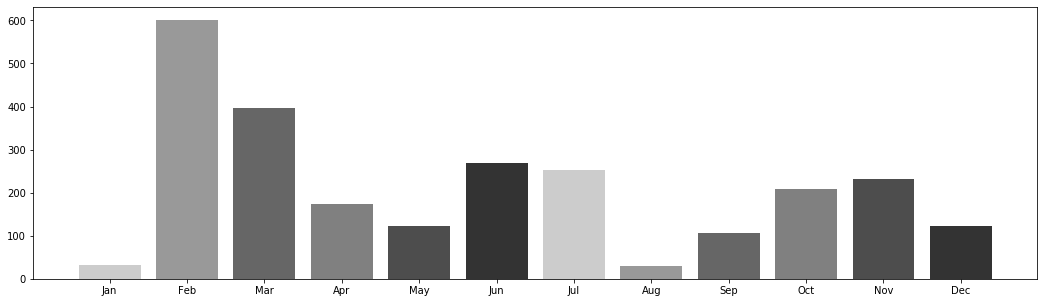

In [9]:
#vidoesPerMonth
#D = {u'Label1':26, u'Label2': 17, u'Label3':30}
valList = [0,0,0,0,0,0,0,0,0,0,0,0]
keyList = ['Jan','Feb','Mar','Apr','May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
for k in sorted(vidoesPerMonth.keys()):
    valList[keyList.index(k)] = vidoesPerMonth[k]

fig= plt.figure(figsize=(18,5))
plt.bar(range(len(vidoesPerMonth)), valList, align='center',color=['0.8','0.6','0.4','0.5','0.3','0.2'])
plt.xticks(range(len(vidoesPerMonth)), keyList)
# # for python 2.x:
# plt.bar(range(len(D)), D.values(), align='center')  # python 2.x
# plt.xticks(range(len(D)), D.keys())  # in python 2.x

plt.show()

February is clearly the most popular month for TED Conferences whereas August and January are the least popular. February's popularity is largely due to the fact that the official TED Conferences are held in February

### 2. Analysis by Year
We will analyze which years have the maximum number of talks from our dataset.
We have extraced year from the date and desgined a function to keep the counter of each year and map it against its key in dictionary.

In [10]:
vidoesPerYear = {}

def videosPerYearCounter(x) :
  y = x.year
  val = vidoesPerYear.get(y, 0)
  val += 1
  vidoesPerYear[y] = val

df['film_date'].apply(
  videosPerYearCounter
)

print (vidoesPerYear)

{2006: 50, 2004: 33, 2005: 66, 2003: 33, 2007: 114, 2002: 27, 2001: 5, 2008: 84, 1984: 1, 1990: 1, 1998: 6, 2009: 232, 1991: 1, 2010: 267, 1983: 1, 1972: 1, 2011: 270, 2012: 267, 1994: 1, 2013: 270, 2014: 237, 2015: 239, 2016: 246, 2017: 98}


After taking the count of talks in each year, we have tried visualizing the same though point plot.
Hear we have use seaborn library which is referenced using sb

[1972, 1983, 1984, 1990, 1991, 1994, 1998, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017]


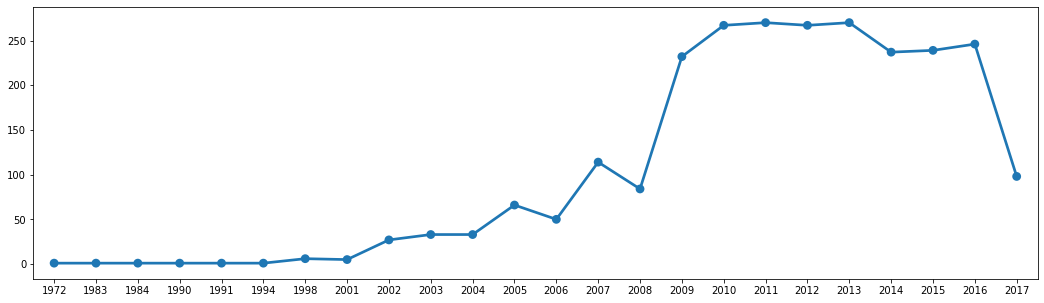

In [11]:
vl = []
kl = []
for k in sorted(vidoesPerYear.keys()):
    vl.append(vidoesPerYear[k])
    kl.append(k)
print (kl)
fig= plt.figure(figsize=(18,5))
sb.pointplot(kl,vl)
plt.show()

Some analysis made from above plot is:
•	As expected, the number of TED Talks have gradually increased over the years since its inception in 1984.
•	There was a sharp increase in the number if talks in 2009.
•	The number of talks have been pretty much constant since 2009.

### 3. Analysis by Day of the week
We will analyze which day of the week is most popular and has the maximum number of talks from our dataset.
We have used day name function to return day of the week by passing date.

In [12]:
vidoesPerDayOfWeek = {}

def videosPerDayOfWeekCounter(x) :
    val = vidoesPerDayOfWeek.get(x[:3], 0)
    val += 1
    vidoesPerDayOfWeek[x[:3]] = val

df['film_date'].dt.day_name().apply(
    videosPerDayOfWeekCounter
)

print(vidoesPerDayOfWeek)


{'Sat': 336, 'Fri': 386, 'Sun': 110, 'Wed': 534, 'Thu': 551, 'Mon': 306, 'Tue': 327}


After taking the count of talks in each particular day of the week, we have tried visualizing the same though bar plot

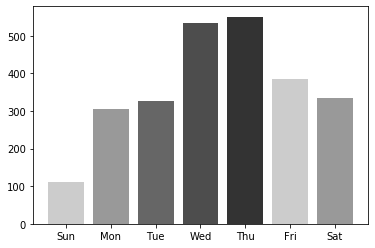

In [13]:
valList = [0,0,0,0,0,0,0]
keyList = ['Sun','Mon','Tue','Wed','Thu', 'Fri', 'Sat']
for k in vidoesPerDayOfWeek.keys():
    valList[keyList.index(k)] = vidoesPerDayOfWeek[k]

    
plt.bar(range(len(vidoesPerDayOfWeek)), valList, align='center',color=['0.8','0.6','0.4','0.3','0.2'])
plt.xticks(range(len(vidoesPerDayOfWeek)), keyList)
plt.show()

The distribution of days is almost a bell curve with Wednesday and Thursday being the most popular days and Sunday being the least popular. 
This is pretty interesting because someone might think that most TED Conferences would happen sometime in the weekend.

# TOP SPEAKERS
After exploring talks distributed throught the year now let us analyse by the speakers who have given most number of TED talks. Here we will gain insight on popular speakers.

In [14]:
topspeakers_df = df.groupby('main_speaker').count().reset_index()[['main_speaker', 'comments']]
topspeakers_df.columns = ['main_speaker', 'appearances']
topspeakers_df = topspeakers_df.sort_values('appearances', ascending=False)
topspeakers_df.head(15)

,main_speaker,appearances
770,Hans Rosling,9
1066,Juan Enriquez,7
1693,Rives,6
1278,Marco Tempest,6
397,Clay Shirky,5
1487,Nicholas Negroponte,5
1075,Julian Treasure,5
424,Dan Ariely,5
850,Jacqueline Novogratz,5
248,Bill Gates,5


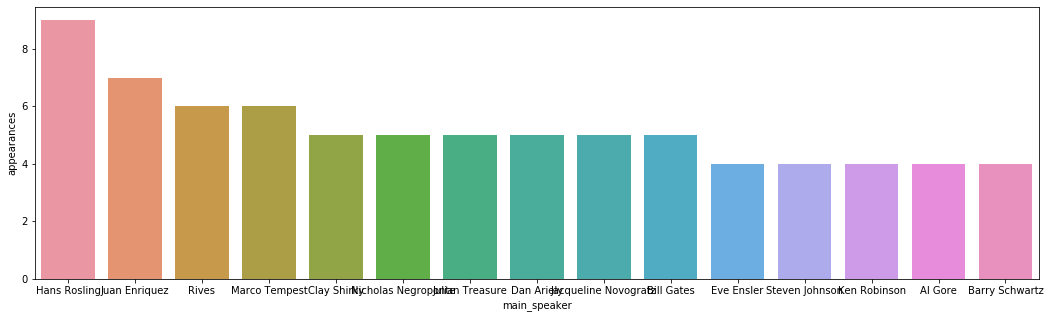

In [15]:
#plotting top speakers on a barplot
plt.figure(figsize=(18,5))
sb.barplot(x='main_speaker', y='appearances', data=topspeakers_df.head(15))
plt.show()

Here we can observe that **Hans Rosling** appears 9 times in TED talks as a main speaker, **Juan Enriquez** as 7 times, **Rives** as 6 times and so on...

Also since **Hans Rosling** is Global health expert and data visionary, this arises a question regarding speakers occupation. Which occupation should you choose if you want to become a TED Speaker? Let us have a look what kind of people TED is most interested in inviting to its events.
 

In [16]:
occupation_df = df.groupby('speaker_occupation').count().reset_index()[['speaker_occupation', 'comments']]
occupation_df.columns = ['occupation', 'appearances']
occupation_df = occupation_df.sort_values('appearances', ascending=False)
occupation_df.head(15)

,occupation,appearances
1426,Writer,45
83,Artist,34
413,Designer,34
753,Journalist,33
515,Entrepreneur,31
71,Architect,30
733,Inventor,27
1131,Psychologist,26
1011,Photographer,25
567,Filmmaker,21


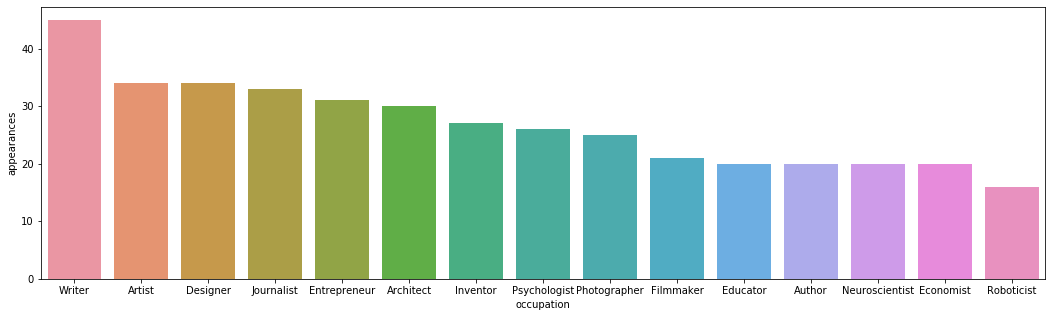

In [17]:
#plotting speaker occupation on a barplot
plt.figure(figsize=(18,5))
sb.barplot(x='occupation', y='appearances', data=occupation_df.head(15))
plt.show()

Here, **Writers** are the most popular with more than 45 speakers identifying themselves as the aforementioned.
**Artists** and **Designers** come a distant second with around 35 speakers in each category.

# Top Events
Now, we will try to answer questions on most worthy events of TED talks..

In [18]:
topevents_df = df[['title', 'event']].groupby('event').count().reset_index()
topevents_df.columns = ['event', 'talks']
topevents_df = topevents_df.sort_values('talks', ascending=False)
topevents_df.head(10)

,event,talks
64,TED2014,84
59,TED2009,83
63,TED2013,77
66,TED2016,77
65,TED2015,75
99,TEDGlobal 2012,70
61,TED2011,70
60,TED2010,68
98,TEDGlobal 2011,68
57,TED2007,68


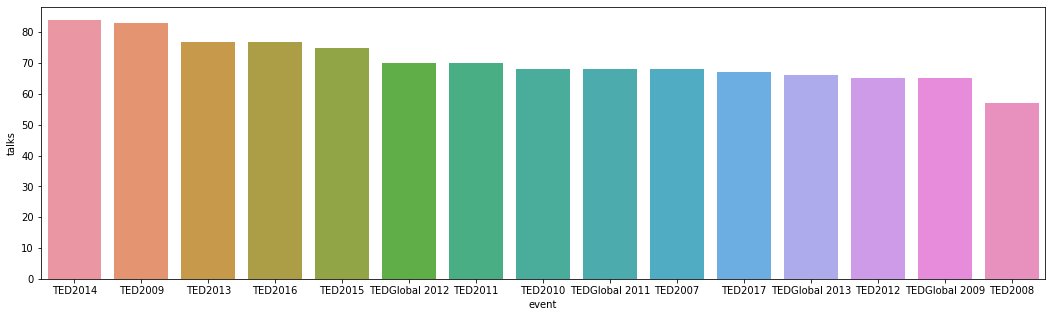

In [19]:
#plotting top events on a barplot
plt.figure(figsize=(18,5))
sb.barplot(x='event', y='talks', data=topevents_df.head(15))
plt.show()

This chart visualizes that event **TED2014** had the most number to talks till date with more than 80 TED talks. Second topmost event is TED2009 with almost similar number of TED talks as TED2014.

## TED Languages
One exceptional aspect of TED Talks is the different number of languages in which it is accessible. Let us perform some very basic data visualisation and descriptive statistics about languages available in TED.

In [20]:
df['languages'].describe()

count    2550.000000
mean       27.326275
std         9.563452
min         0.000000
25%        23.000000
50%        28.000000
75%        33.000000
max        72.000000
Name: languages, dtype: float64

On average, a TED Talk is available in 27 different languages. The maximum number of languages a TED Talk is available in is a staggering 72. Let us check which talk this is.

In [21]:
df[df['languages'] == 72]

,comments,description,duration,event,film_date,languages,main_speaker,name,num_speaker,published_date,ratings,related_talks,speaker_occupation,tags,title,url,views
973,736,"Is there something you've always meant to do, ...",3.45,TED2011,2011-03-03,72,Matt Cutts,Matt Cutts: Try something new for 30 days,1,2011-07-01 15:14:00,"[{'id': 10, 'name': 'Inspiring', 'count': 6171...","[{'id': 947, 'hero': 'https://pe.tedcdn.com/im...",Technologist,"['culture', 'success']",Try something new for 30 days,https://www.ted.com/talks/matt_cutts_try_somet...,8838874


The most translated TED Talk of all time is Matt Cutts' Try Something New in 30 Days. The talk does have a very universal theme of exploration. The number of languages it's available in demands a little more inspection though as it has just over 8 million views, far lesser than the most popular TED Talks.

Finally, let us check if there is a correlation between the number of views and the number of languages a talk is available in. We would think that this should be the case since the talk is more accessible to a larger number of people but as Matt Cutts' talk shows, it may not really be the case.

In [22]:
df.corr()

,comments,duration,languages,num_speaker,views
comments,1.000000,0.140694,0.318284,-0.035489,0.530939
duration,0.140694,1.000000,-0.295681,0.022257,0.048740
languages,0.318284,-0.295681,1.000000,-0.063100,0.377623
num_speaker,-0.035489,0.022257,-0.063100,1.000000,-0.026389
views,0.530939,0.048740,0.377623,-0.026389,1.000000


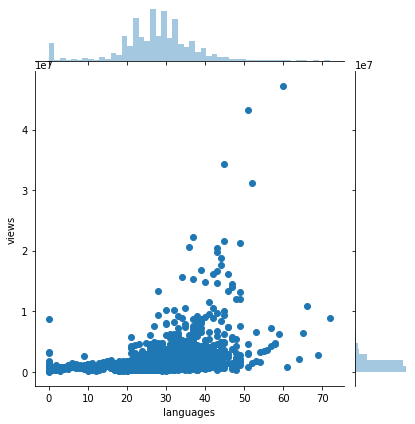

In [23]:
import seaborn as sns
sns.jointplot(x='languages', y='views', data=df)
plt.show()

## TED Themes
In this section, we will try to find out the most popular themes in the TED conferences. Although TED started out as a conference about technology, entertainment and design, it has since diversified into virtually every field of study and walk of life. It will be interesting to see if this conference with Silicon Valley origins has a bias towards certain topics.

To answer this question, we need to wrangle our data in a way that it is suitable for analysis. More specifically, we need to split the related_tags list into separate rows.

In [24]:
import ast
df['tags'] = df['tags'].apply(lambda x: ast.literal_eval(x))

In [25]:
s = df.apply(lambda x: pd.Series(x['tags']),axis=1).stack().reset_index(level=1, drop=True)
s.name = 'theme'

In [26]:
theme_df = df.drop('tags', axis=1).join(s)
theme_df.head()

,comments,description,duration,event,film_date,languages,main_speaker,name,num_speaker,published_date,ratings,related_talks,speaker_occupation,title,url,views,theme
0,4553,Sir Ken Robinson makes an entertaining and pro...,19.4,TED2006,2006-02-25,60,Ken Robinson,Ken Robinson: Do schools kill creativity?,1,2006-06-27 00:11:00,"[{'id': 7, 'name': 'Funny', 'count': 19645}, {...","[{'id': 865, 'hero': 'https://pe.tedcdn.com/im...",Author/educator,Do schools kill creativity?,https://www.ted.com/talks/ken_robinson_says_sc...,47227110,children
0,4553,Sir Ken Robinson makes an entertaining and pro...,19.4,TED2006,2006-02-25,60,Ken Robinson,Ken Robinson: Do schools kill creativity?,1,2006-06-27 00:11:00,"[{'id': 7, 'name': 'Funny', 'count': 19645}, {...","[{'id': 865, 'hero': 'https://pe.tedcdn.com/im...",Author/educator,Do schools kill creativity?,https://www.ted.com/talks/ken_robinson_says_sc...,47227110,creativity
0,4553,Sir Ken Robinson makes an entertaining and pro...,19.4,TED2006,2006-02-25,60,Ken Robinson,Ken Robinson: Do schools kill creativity?,1,2006-06-27 00:11:00,"[{'id': 7, 'name': 'Funny', 'count': 19645}, {...","[{'id': 865, 'hero': 'https://pe.tedcdn.com/im...",Author/educator,Do schools kill creativity?,https://www.ted.com/talks/ken_robinson_says_sc...,47227110,culture
0,4553,Sir Ken Robinson makes an entertaining and pro...,19.4,TED2006,2006-02-25,60,Ken Robinson,Ken Robinson: Do schools kill creativity?,1,2006-06-27 00:11:00,"[{'id': 7, 'name': 'Funny', 'count': 19645}, {...","[{'id': 865, 'hero': 'https://pe.tedcdn.com/im...",Author/educator,Do schools kill creativity?,https://www.ted.com/talks/ken_robinson_says_sc...,47227110,dance
0,4553,Sir Ken Robinson makes an entertaining and pro...,19.4,TED2006,2006-02-25,60,Ken Robinson,Ken Robinson: Do schools kill creativity?,1,2006-06-27 00:11:00,"[{'id': 7, 'name': 'Funny', 'count': 19645}, {...","[{'id': 865, 'hero': 'https://pe.tedcdn.com/im...",Author/educator,Do schools kill creativity?,https://www.ted.com/talks/ken_robinson_says_sc...,47227110,education


In [27]:
len(theme_df['theme'].value_counts())

416

TED defines a staggering **416 different categories** for its talks. Let us now check the most popular themes.

In [28]:
popular_themes = pd.DataFrame(theme_df['theme'].value_counts()).reset_index()
popular_themes.columns = ['theme', 'talks']
popular_themes.head(10)

,theme,talks
0,technology,727
1,science,567
2,global issues,501
3,culture,486
4,TEDx,450
5,design,418
6,business,348
7,entertainment,299
8,health,236
9,innovation,229


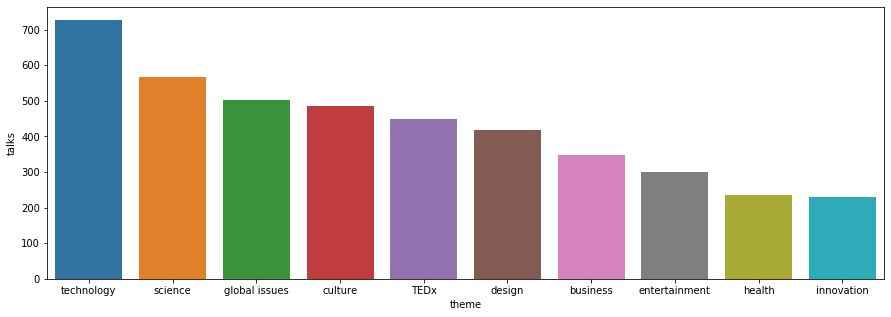

In [29]:
plt.figure(figsize=(15,5))
sns.barplot(x='theme', y='talks', data=popular_themes.head(10))
plt.show()

As may have been expected, Technology is the most popular topic for talks. The other two original factions, Design and Entertainment, also make it to the list of top 10 themes. Science and Global Issues are the second and the third most popular themes respectively.

The next question I want to answer is the trends in the share of topics of TED Talks across the world. Has the demand for Technology talks increased? Do certain years have a disproportionate share of talks related to global issues? Let's find out!

We will only be considering the top 7 themes, excluding TEDx and talks after 2009, the year when the number of TED Talks really peaked.

In [30]:
from datetime import datetime

pop_theme_talks = theme_df[(theme_df['theme'].isin(popular_themes.head(8)['theme'])) & (theme_df['theme'] != 'TEDx')]
pop_theme_talks['date']  = pd.to_datetime(pop_theme_talks['film_date'], unit='s')
pop_theme_talks['y'] = pop_theme_talks['date'].dt.year
pop_theme_talks.head(10)

,comments,description,duration,event,film_date,languages,main_speaker,name,num_speaker,published_date,ratings,related_talks,speaker_occupation,title,url,views,theme,date,y
0,4553,Sir Ken Robinson makes an entertaining and pro...,19.400000,TED2006,2006-02-25,60,Ken Robinson,Ken Robinson: Do schools kill creativity?,1,2006-06-27 00:11:00,"[{'id': 7, 'name': 'Funny', 'count': 19645}, {...","[{'id': 865, 'hero': 'https://pe.tedcdn.com/im...",Author/educator,Do schools kill creativity?,https://www.ted.com/talks/ken_robinson_says_sc...,47227110,culture,2006-02-25,2006
1,265,With the same humor and humanity he exuded in ...,16.283333,TED2006,2006-02-25,43,Al Gore,Al Gore: Averting the climate crisis,1,2006-06-27 00:11:00,"[{'id': 7, 'name': 'Funny', 'count': 544}, {'i...","[{'id': 243, 'hero': 'https://pe.tedcdn.com/im...",Climate advocate,Averting the climate crisis,https://www.ted.com/talks/al_gore_on_averting_...,3200520,culture,2006-02-25,2006
1,265,With the same humor and humanity he exuded in ...,16.283333,TED2006,2006-02-25,43,Al Gore,Al Gore: Averting the climate crisis,1,2006-06-27 00:11:00,"[{'id': 7, 'name': 'Funny', 'count': 544}, {'i...","[{'id': 243, 'hero': 'https://pe.tedcdn.com/im...",Climate advocate,Averting the climate crisis,https://www.ted.com/talks/al_gore_on_averting_...,3200520,global issues,2006-02-25,2006
1,265,With the same humor and humanity he exuded in ...,16.283333,TED2006,2006-02-25,43,Al Gore,Al Gore: Averting the climate crisis,1,2006-06-27 00:11:00,"[{'id': 7, 'name': 'Funny', 'count': 544}, {'i...","[{'id': 243, 'hero': 'https://pe.tedcdn.com/im...",Climate advocate,Averting the climate crisis,https://www.ted.com/talks/al_gore_on_averting_...,3200520,science,2006-02-25,2006
1,265,With the same humor and humanity he exuded in ...,16.283333,TED2006,2006-02-25,43,Al Gore,Al Gore: Averting the climate crisis,1,2006-06-27 00:11:00,"[{'id': 7, 'name': 'Funny', 'count': 544}, {'i...","[{'id': 243, 'hero': 'https://pe.tedcdn.com/im...",Climate advocate,Averting the climate crisis,https://www.ted.com/talks/al_gore_on_averting_...,3200520,technology,2006-02-25,2006
2,124,New York Times columnist David Pogue takes aim...,21.433333,TED2006,2006-02-24,26,David Pogue,David Pogue: Simplicity sells,1,2006-06-27 00:11:00,"[{'id': 7, 'name': 'Funny', 'count': 964}, {'i...","[{'id': 1725, 'hero': 'https://pe.tedcdn.com/i...",Technology columnist,Simplicity sells,https://www.ted.com/talks/david_pogue_says_sim...,1636292,entertainment,2006-02-24,2006
2,124,New York Times columnist David Pogue takes aim...,21.433333,TED2006,2006-02-24,26,David Pogue,David Pogue: Simplicity sells,1,2006-06-27 00:11:00,"[{'id': 7, 'name': 'Funny', 'count': 964}, {'i...","[{'id': 1725, 'hero': 'https://pe.tedcdn.com/i...",Technology columnist,Simplicity sells,https://www.ted.com/talks/david_pogue_says_sim...,1636292,technology,2006-02-24,2006
3,200,"In an emotionally charged talk, MacArthur-winn...",18.600000,TED2006,2006-02-26,35,Majora Carter,Majora Carter: Greening the ghetto,1,2006-06-27 00:11:00,"[{'id': 3, 'name': 'Courageous', 'count': 760}...","[{'id': 1041, 'hero': 'https://pe.tedcdn.com/i...",Activist for environmental justice,Greening the ghetto,https://www.ted.com/talks/majora_carter_s_tale...,1697550,business,2006-02-26,2006
4,593,You've never seen data presented like this. Wi...,19.833333,TED2006,2006-02-22,48,Hans Rosling,Hans Rosling: The best stats you've ever seen,1,2006-06-27 20:38:00,"[{'id': 9, 'name': 'Ingenious', 'count': 3202}...","[{'id': 2056, 'hero': 'https://pe.tedcdn.com/i...",Global health expert; data visionary,The best stats you've ever seen,https://www.ted.com/talks/hans_rosling_shows_t...,12005869,global issues,2006-02-22,2006
5,672,"Tony Robbins discusses the ""invisible forces"" ...",21.750000,TED2006,2006-02-02,36,Tony Robbins,Tony Robbins: Why we do what we do,1,2006-06-27 20:38:00,"[{'id': 7, 'name': 'Funny', 'count': 1102}, {'...","[{'id': 229, 'hero': 'https://pe.tedcdn.com/im...",Life coach; exper

In [31]:
pop_theme_talks['y'] = pop_theme_talks['y'].astype('int')
pop_theme_talks = pop_theme_talks[pop_theme_talks['y'] > 2008]
#print(pop_theme_talks)

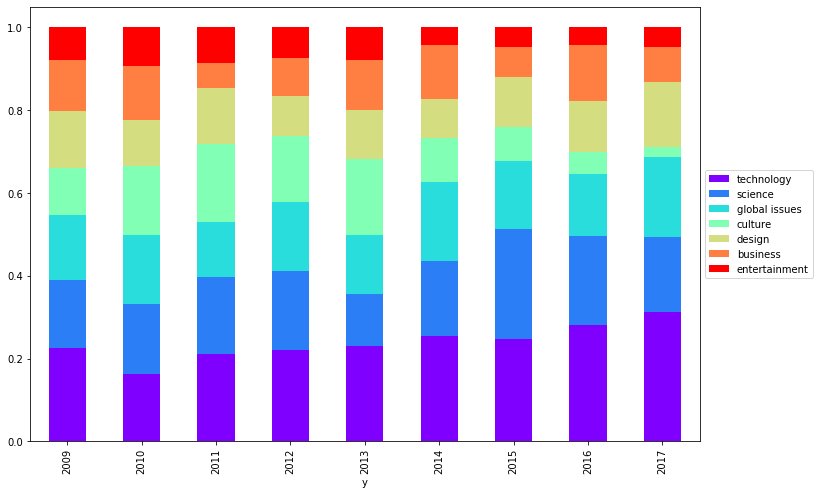

In [32]:
themes = list(popular_themes.head(8)['theme'])
themes.remove('TEDx')
ctab = pd.crosstab([pop_theme_talks['y']], pop_theme_talks['theme']).apply(lambda x: x/x.sum(), axis=1)
ctab[themes].plot(kind='bar', stacked=True, colormap='rainbow', figsize=(12,8)).legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

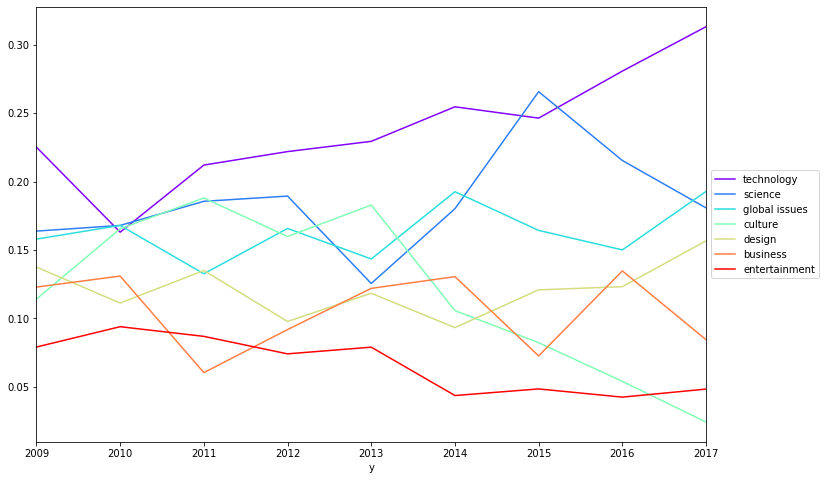

In [33]:
ctab[themes].plot(kind='line', stacked=False, colormap='rainbow', figsize=(12,8)).legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

### Which talks tend to attract the largest amount of discussion?

* We will define a new feature discussion quotient, this is simply the ratio of the number of comments to the number of views.
* We will also check which talks have the TOP 20 Talks,with the highest discussion quotient.

In [34]:
df['disc_quot'] = df['comments']/df['views'] #creating a new df column with the existing df columns. diving the comments with views.

In [35]:
discussion_quotient = df[['title', 'main_speaker','disc_quot','views', 'comments', 'film_date']].sort_values('disc_quot', ascending=False).head(20) #this will give us the discussion quotietn in descending order.
discussion_quotient

,title,main_speaker,disc_quot,views,comments,film_date
744,The case for same-sex marriage,Diane J. Savino,0.002220,292395,649,2009-12-02
803,E-voting without fraud,David Bismark,0.001534,543551,834,2010-07-14
96,Militant atheism,Richard Dawkins,0.001464,4374792,6404,2002-02-02
694,Inside a school for suicide bombers,Sharmeen Obaid-Chinoy,0.001421,1057238,1502,2010-02-10
954,Taking imagination seriously,Janet Echelman,0.001360,1832930,2492,2011-03-03
840,On reading the Koran,Lesley Hazleton,0.001285,1847256,2374,2010-10-10
876,Curating humanity's heritage,Elizabeth Lindsey,0.001264,439180,555,2010-12-08
1787,How do you explain consciousness?,David Chalmers,0.001236,2162764,2673,2014-03-18
661,The danger of science denial,Michael Specter,0.001236,1838628,2272,2010-02-11
561,Dance to change the world,Mallika Sarabhai,0.001235,481834,595,2009-11-04


* From the discussion_qoutient we gain that the most discussed TED talk is The Case for Same-Sex Marriage.
* We have gained extremely interesting insights from this analysis. 
* More than half of the talks in our TOP 20 are on the faith and religion. 
* From the observations it can be seen that science and religion are still the hot debated topics in the 21st century. 

In [36]:
df['duration'].describe()

count    2550.000000
mean       13.775170
std         6.233486
min         2.250000
25%         9.616667
50%        14.133333
75%        17.445833
max        87.600000
Name: duration, dtype: float64

From the above statistics we can observe that the smallest talk is just of 2.25 minutes and the largest talk is of 87 minutes. 

As shown in the begining, we have two data sets for the ted talks; the first one is for ted talk statistics and the other is for the talk content in textual format. 
For our futher analysis, we will merge both our data sets.

In [37]:
df2 = pd.merge(df, df1, on='url')
df2.head()

,comments,description,duration,event,film_date,languages,main_speaker,name,num_speaker,published_date,ratings,related_talks,speaker_occupation,tags,title,url,views,disc_quot,transcript
0,4553,Sir Ken Robinson makes an entertaining and pro...,19.400000,TED2006,2006-02-25,60,Ken Robinson,Ken Robinson: Do schools kill creativity?,1,2006-06-27 00:11:00,"[{'id': 7, 'name': 'Funny', 'count': 19645}, {...","[{'id': 865, 'hero': 'https://pe.tedcdn.com/im...",Author/educator,"[children, creativity, culture, dance, educati...",Do schools kill creativity?,https://www.ted.com/talks/ken_robinson_says_sc...,47227110,0.000096,Good morning. How are you?(Laughter)It's been ...
1,265,With the same humor and humanity he exuded in ...,16.283333,TED2006,2006-02-25,43,Al Gore,Al Gore: Averting the climate crisis,1,2006-06-27 00:11:00,"[{'id': 7, 'name': 'Funny', 'count': 544}, {'i...","[{'id': 243, 'hero': 'https://pe.tedcdn.com/im...",Climate advocate,"[alternative energy, cars, climate change, cul...",Averting the climate crisis,https://www.ted.com/talks/al_gore_on_averting_...,3200520,0.000083,"Thank you so much, Chris. And it's truly a gre..."
2,124,New York Times columnist David Pogue takes aim...,21.433333,TED2006,2006-02-24,26,David Pogue,David Pogue: Simplicity sells,1,2006-06-27 00:11:00,"[{'id': 7, 'name': 'Funny', 'count': 964}, {'i...","[{'id': 1725, 'hero': 'https://pe.tedcdn.com/i...",Technology columnist,"[computers, entertainment, interface design, m...",Simplicity sells,https://www.ted.com/talks/david_pogue_says_sim...,1636292,0.000076,"(Music: ""The Sound of Silence,"" Simon & Garfun..."
3,200,"In an emotionally charged talk, MacArthur-winn...",18.600000,TED2006,2006-02-26,35,Majora Carter,Majora Carter: Greening the ghetto,1,2006-06-27 00:11:00,"[{'id': 3, 'name': 'Courageous', 'count': 760}...","[{'id': 1041, 'hero': 'https://pe.tedcdn.com/i...",Activist for environmental justice,"[MacArthur grant, activism, business, cities, ...",Greening the ghetto,https://www.ted.com/talks/majora_carter_s_tale...,1697550,0.000118,If you're here today — and I'm very happy that...
4,593,You've never seen data presented like this. Wi...,19.833333,TED2006,2006-02-22,48,Hans Rosling,Hans Rosling: The best stats you've ever seen,1,2006-06-27 20:38:00,"[{'id': 9, 'name': 'Ingenious', 'count': 3202}...","[{'id': 2056, 'hero': 'https://pe.tedcdn.com/i...",Global health expert; data visionary,"[Africa, Asia, Google, demo, economics, global...",The best stats you've ever seen,https://www.ted.com/talks/hans_rosling_shows_t...,12005869,0.000049,"About 10 years ago, I took on the task to teac..."


In [38]:
df2['wc'] = df2['transcript'].apply(lambda x: len(x.split()))

In [39]:
df2['wc'].describe()


count    2467.000000
mean     2040.279287
std       956.209248
min         1.000000
25%      1332.500000
50%      2028.000000
75%      2707.000000
max      9044.000000
Name: wc, dtype: float64

# Statistical Analysis and Machine Learning

Firstly, we have found the correlation among variables for our data.
Let us find the correlation in our different variables. Also we will apply linear multiple regression to predict the number of views a video will get based on different parameteers affecting a video.

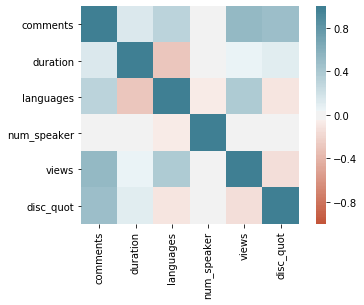

In [40]:
df.corr()
x=df.corr()
x = sb.heatmap(
    x, 
    vmin=-1, vmax=1, center=0,
    cmap=sb.diverging_palette(20, 220, n=200),
    square=True)



Below is the pairs matrix which will give correlation among all variables with each other.

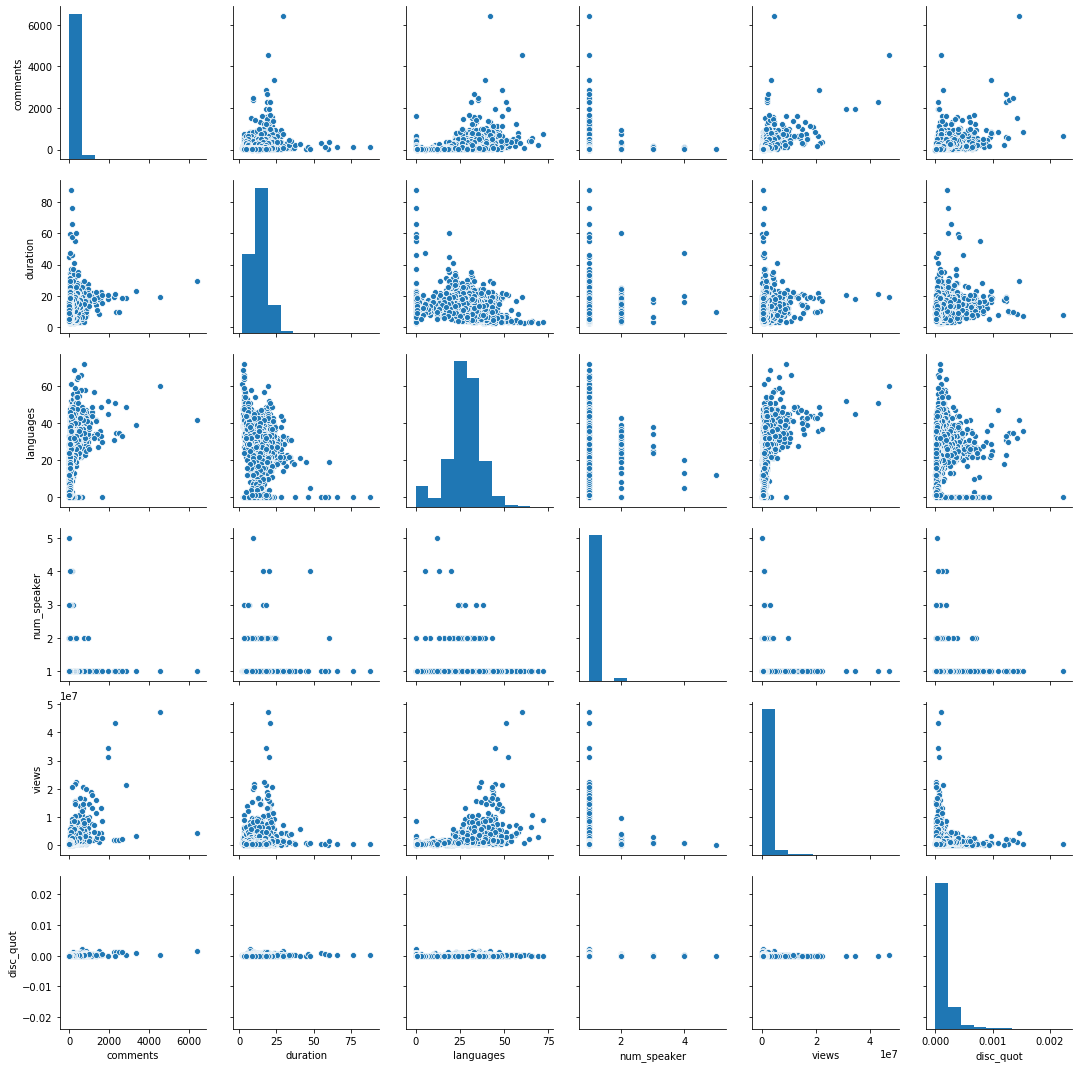

In [41]:
sns.pairplot(df)

From above, we could see that a good correlation among views and comments is seen. We will analyze views and comments and then go ahead with linear model for these variables.

### Analysis on VIEWS.


### TOP 20

#### There are times when we are interested in knowing the top viewed TED Talks.
#### Let us arrange the table in Ascending order of the number of views so that we can see the TOP 20 viewed content first.

In [42]:
most_views = df[['main_speaker','views','title', 'film_date','url']] #these are the columns we want to display.
ms = most_views.sort_values('views', ascending=False)[:20] #this will sort in descending order of the views.
ms

,main_speaker,views,title,film_date,url
0,Ken Robinson,47227110,Do schools kill creativity?,2006-02-25,https://www.ted.com/talks/ken_robinson_says_sc...
1346,Amy Cuddy,43155405,Your body language may shape who you are,2012-06-26,https://www.ted.com/talks/amy_cuddy_your_body_...
677,Simon Sinek,34309432,How great leaders inspire action,2009-09-17,https://www.ted.com/talks/simon_sinek_how_grea...
837,Brené Brown,31168150,The power of vulnerability,2010-06-06,https://www.ted.com/talks/brene_brown_on_vulne...
452,Mary Roach,22270883,10 things you didn't know about orgasm,2009-02-06,https://www.ted.com/talks/mary_roach_10_things...
1776,Julian Treasure,21594632,How to speak so that people want to listen,2013-06-10,https://www.ted.com/talks/julian_treasure_how_...
201,Jill Bolte Taylor,21190883,My stroke of insight,2008-02-27,https://www.ted.com/talks/jill_bolte_taylor_s_...
5,Tony Robbins,20685401,Why we do what we do,2006-02-02,https://www.ted.com/talks/tony_robbins_asks_wh...
2114,James Veitch,20475972,This is what happens when you reply to spam email,2015-12-08,https://www.ted.com/talks/james_veitch_this_is...
1416,Cameron Russell,19787465,"Looks aren't everything. Believe me, I'm a model.",2012-10-27,https://www.ted.com/talks/cameron_russell_look...


We can observe that Ken Robinson's, Do schools kill creativity? has the highest amount of views- 47.2 million.
Amy Cuddy's talk is followed by Robinson's talk with 43.1 million views.
40 million mark has crossed only by 2 talks.
30 million mark has crossed only by 4 talks.

#### Let us create a bar plot to visualize the data for the TOP 20 views.

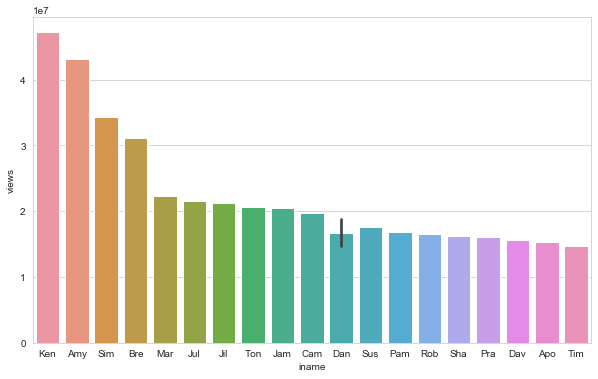

In [43]:
ms['iname'] = ms['main_speaker'].apply(lambda x: x[:3]) #this will take the first 3 initials of the name
plt.figure(figsize=(10,6)) #figure size is assigned
sns.set_style("whitegrid") #this is the standard style whitegrid for colourful bar plot.
sns.barplot(x='iname', y='views', data=ms) #plotting the bar plot

#### Let us create a distribution plot to see the distribution based on the views.

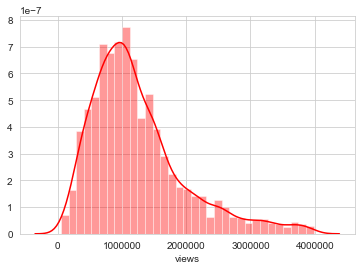

In [44]:
sns.set_color_codes() #this is used to make the bar plot colourful
ax= sns.distplot(df[df['views'] < 0.4e7]['views'],color="red") #this will give the distribution of the views

#### It is very useful to know the stats of the number of views just to see how well the TED Talk is doing.

In [45]:
stats = df['views'].describe() #df.describe() is used to get the stats of the data.
stats

count    2.550000e+03
mean     1.698297e+06
std      2.498479e+06
min      5.044300e+04
25%      7.557928e+05
50%      1.124524e+06
75%      1.700760e+06
max      4.722711e+07
Name: views, dtype: float64

We observe that the AVERAGE number of views on TED Talks is 1.6 million.
Also the MEDIAN number of views is 1.12 million, this means that the popularity of the TED Talks is very HIGH.
This shows that TED Talks is viewed by a high number of people worldwide.

### Analysis on COMMENTS.

### TOP 20

#### There are times when we are interested in knowing the top commented TED Talks.
#### Let us arrange the table in Ascending order of the number of views so that we can see the TOP 20 most commented content first.

In [46]:
most_comments= df[['comments','main_speaker','title','views','film_date']]
mc= most_comments.sort_values('comments', ascending=False).head(20) #this sorts the comments in the descending order and gives us most no. of comments on the top.
mc

,comments,main_speaker,title,views,film_date
96,6404,Richard Dawkins,Militant atheism,4374792,2002-02-02
0,4553,Ken Robinson,Do schools kill creativity?,47227110,2006-02-25
644,3356,Sam Harris,Science can answer moral questions,3433437,2010-02-11
201,2877,Jill Bolte Taylor,My stroke of insight,21190883,2008-02-27
1787,2673,David Chalmers,How do you explain consciousness?,2162764,2014-03-18
954,2492,Janet Echelman,Taking imagination seriously,1832930,2011-03-03
840,2374,Lesley Hazleton,On reading the Koran,1847256,2010-10-10
1346,2290,Amy Cuddy,Your body language may shape who you are,43155405,2012-06-26
661,2272,Michael Specter,The danger of science denial,1838628,2010-02-11
677,1930,Simon Sinek,How great leaders inspire action,34309432,2009-09-17


We can observe that Richard Dawkin's, Militant atheism has the highest amount of comments- 6404.
Richard Dawkin's talk is followed by Robinson's talk with 4553 comments.
Only 1 Talk has crossed 6K comments and only 2 talks have crossed 4K comments.

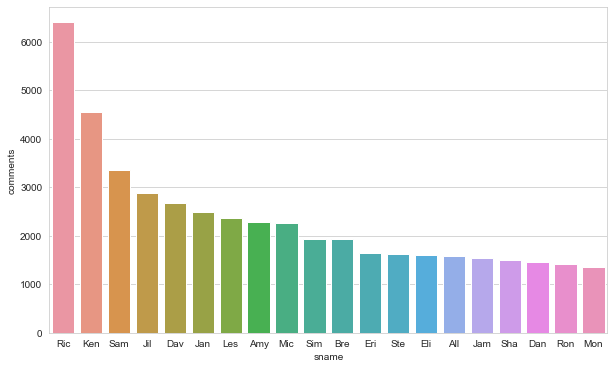

In [47]:
mc['sname'] = mc['main_speaker'].apply(lambda x: x[:3]) #this will take the first 3 initials of the name
plt.figure(figsize=(10,6)) #figure size is assigned
sns.set_style("whitegrid") #this is the standard style whitegrid for colourful bar plot.
sns.barplot(x='sname', y='comments', data=mc) #plotting the bar plot

#### Let us create a distribution plot to see the distribution based on the comments.

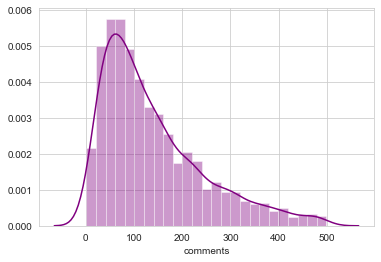

In [48]:
sns.set_color_codes() #this is used to make the bar plot colourful
ax= sns.distplot(df[df['comments'] < 500]['comments'],color="purple") #this will give the distribution of the comments

* We can see from the distribution plot that many of the talks have fewer than 500 comments. 
* This clearly says that the mean obtained above has been heavily influenced by outliers. This maybe because there are only 2550 observations.

#### It is very usefull to know the stats of the number of comments just to see the amount of discussions created on the TED Talks.

In [49]:
stats2 = df['comments'].describe() #df.describe() is used to get the stats of the data.
stats2

count    2550.000000
mean      191.562353
std       282.315223
min         2.000000
25%        63.000000
50%       118.000000
75%       221.750000
max      6404.000000
Name: comments, dtype: float64

* We observe, there are 191.5 comments on every TED Talk.
* Videos create a lot of posituve and negative critism.It can be concluded that the Online community is highly involved in discussions based on the TED Talk videos.
* The standard deviation is larger than the mean.
* The Minimum number of comments on a TED Talk video is 2.(This can be less if the Talk is posted recently and not views much.)
* The Maximum number of comments on a TED Talk video is 6404.

#### Let us revisualize the relationship of the number views with the number of comments, which looks somewhat linearly related

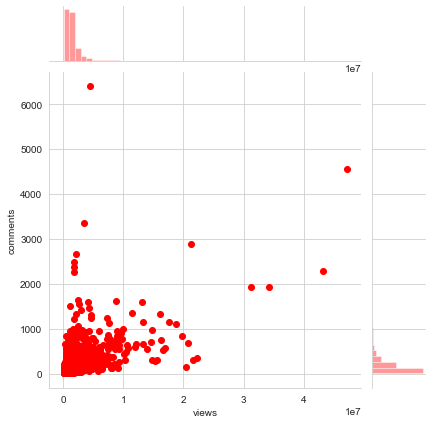

In [50]:
correlation= sns.jointplot(x='views', y='comments', data=df, color= 'red') #This gives us the scatter plot for views and comments.
correlation

In [51]:
correlation= df[['views', 'comments']].corr() #this .corr() gives us the correlation between views and comments.
correlation

,views,comments
views,1.000000,0.530939
comments,0.530939,1.000000


* As the scatterplot and the correlation matrix show, the pearson coefficient is a bit more than 0.5.
* This shows that there is a good correlation between the views and comments.

### Analysing outliers using boxplot

393.0999999999999

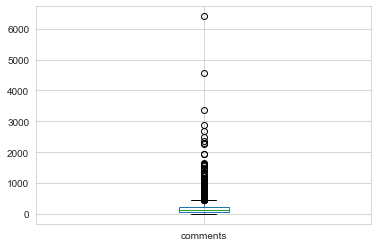

In [52]:
#Boxplot for comments distribution
df.boxplot(column = "comments")
df["comments"].quantile(0.9)

(255, 18)

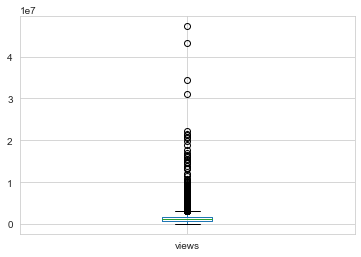

In [53]:
#Boxplot for views distribution
df.boxplot(column = "views")
df["views"].quantile(0.9)
df[df["views"] > 3051912].shape

Series([], Name: main_speaker, dtype: object)

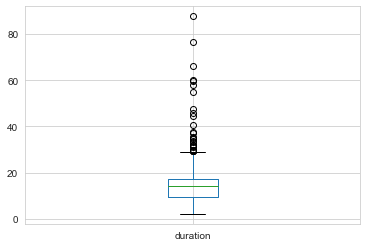

In [54]:
df.boxplot(column = "duration")
# ted["duration"].quantile(0.9)
# ted["duration"].max()
df[df["duration"] == 5256].title
df[df["duration"] == 5256].main_speaker

### Principal Component Analysis:

We tried applying dimensionality reduction to our model, to check if there are any columns that can be combined and reduced to one.

In [55]:
# Import the kmeans clustering model.
from sklearn.cluster import KMeans

# Initialize the model with 2 parameters -- number of clusters and random state.
kmeans_model = KMeans(n_clusters=5, random_state=1)
# Get only the numeric columns from games.
good_columns = df._get_numeric_data()
# Fit the model using the good columns.
kmeans_model.fit(good_columns)
# Get the cluster assignments.
labels = kmeans_model.labels_

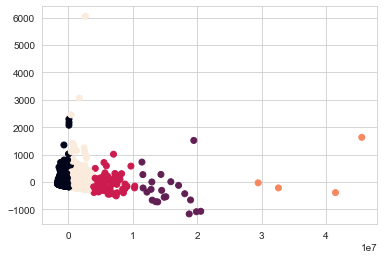

In [56]:
#Trying PCA
from sklearn.decomposition import PCA
# Create a PCA model.
pca_2 = PCA(2)
# Fit the PCA model on the numeric columns from earlier.
plot_columns = pca_2.fit_transform(good_columns)
# Make a scatter plot of each game, shaded according to cluster assignment.
plt.scatter(x=plot_columns[:,0], y=plot_columns[:,1], c=labels)
# Show the plot.
plt.show()

From above plot of PCA, we can see that there is no specific cluster containing specific amount of variance.
Hence applying PCA will not help in this case.
And this further confirms that variables are not very correlated. So lets proceed with linear regression on our original variables in our dataset.

###  Linear Regression

From our dataset, to predict the number of views a video will get, we have several independent variables.
Here, duration, comments and languages are our independent variables, and views is our dependent variable.
Below we have created columns and target.
Columns contain our independent variables and traget contains our dependent variable.

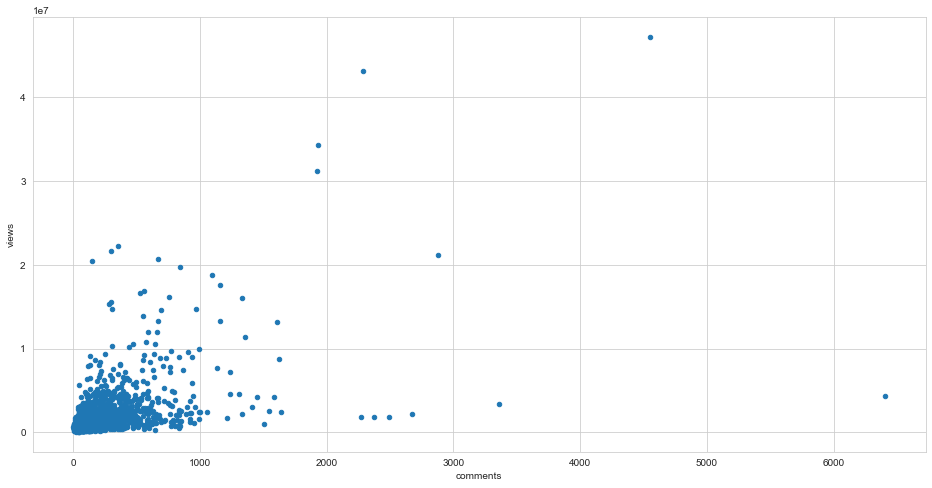

In [57]:
# visualize the relationship between the comments and the views using scatterplots
df.plot(kind='scatter', x='comments', y='views', figsize=(16, 8))

In [58]:
# Get all the columns from the dataframe.
columns = df.columns.tolist()
# Filter the columns to remove ones we don't want.
columns = ["duration","comments","languages"]

# Store the variable we'll be predicting on.
target = "views"

Now, we have created the two sub datasets. One with training data and one with test data.
Training data for our model is 80% of our datset.
Remaining data is used as test data.

In [59]:
# this is the standard import if you're using "formula notation" (similar to R)
import statsmodels.formula.api as smf

# create a fitted model in one line
lm = smf.ols(formula='views ~ comments', data=df).fit()

# print the coefficients
lm.params

Intercept    798186.590794
comments       4698.788029
dtype: float64

### Interpreting the above result:
* A "unit" increase in comments spending is associated with a 4698.788029 "unit" increase in views.

Note that if an increase in comments  was associated with a decrease in views, correlation would be negative

In [60]:
# you have to create a DataFrame since the Statsmodels formula interface expects it
X_new = pd.DataFrame({'comments': [46]})
X_new.head()

,comments
0,46


In [61]:
# use the model to make predictions on a new value
lm.predict(X_new)

0    1.014331e+06
dtype: float64

In [62]:
# manually calculate the prediction
798186.590794 + 4698.788029*10

845174.471084

Thus, the model we got gives the result of views predicted manually and from the model as same.

In [63]:
lm.rsquared

0.2818959038175063

### Multiple Regression Model
#### Now lets create another model with other variables as well like, duration and languages.

Here we have taken training data as 60 % of our dataset. and rest as test data.

In [87]:
X = df[["duration","comments","languages"]]
Y = df['views']

In [88]:
#Splitting the dataset into test and train sets
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.4)

In [89]:
import statsmodels.api as sm
model = sm.OLS(y_train,x_train)
result = model.fit()

In [90]:
#Coefficients
result.params

duration    -10750.129818
comments      3153.128253
languages    47312.642770
dtype: float64

In [91]:
predictions = result.predict(x_test)
predictions

1626    1.378196e+06
904     2.269827e+06
2233    1.394162e+06
1538    1.417543e+06
2509    7.460693e+05
2428    9.232449e+05
2040    1.090297e+06
1012    2.086094e+06
1686    1.471263e+06
3       2.086616e+06
161     1.160881e+06
811     2.085999e+06
2363    1.765647e+06
597     1.175270e+06
2441    1.342884e+06
1234    1.616159e+06
2499    5.744773e+05
2046    1.717536e+06
2505    6.383807e+05
525     2.293576e+06
711     3.532164e+06
79      1.367244e+06
1767    2.642765e+06
620     1.811655e+06
139     1.632667e+06
1322    9.294707e+05
400     1.424923e+06
431     9.617175e+05
2157    1.596948e+06
799     1.841468e+06
            ...     
571     2.045856e+06
2065    1.662854e+06
725     1.931969e+06
1716    1.848719e+06
1402    1.780300e+06
2425    7.404749e+05
1015    1.785131e+06
1885    2.468819e+06
646     2.163266e+06
1125    8.873495e+04
1814    1.993713e+06
91      1.039037e+06
2485    4.307464e+05
1690    1.619379e+06
1086    1.454669e+05
2495    2.714083e+05
2267    1.201

In [92]:
#print a summary of the fitted model
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  views   R-squared (uncentered):                   0.543
Model:                            OLS   Adj. R-squared (uncentered):              0.542
Method:                 Least Squares   F-statistic:                              604.8
Date:                Tue, 10 Dec 2019   Prob (F-statistic):                   4.93e-259
Time:                        16:51:48   Log-Likelihood:                         -24308.
No. Observations:                1530   AIC:                                  4.862e+04
Df Residuals:                    1527   BIC:                                  4.864e+04
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
duration   -1.075e+04   5676.378     -1.894      0.058   -2.19e+04     384.192
comments    3153.1283    173.677     18.155      0.000    2812.457    3493.799
languages   4.731e+04   3128.122     15.125      0.000    4.12e+04    5.34e+04
==============================================================================
Omnibus:                     1725.536   Durbin-Watson:                   1.947
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           302394.902
Skew:                           5.346   Prob(JB):                         0.00
Kurtosis:                      71.038   Cond. No.                         44.6
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

How do we interpret these coefficients? For a given amount of duration and languages , an increase of 1 comments is associated with an increase in views of 3153.678 views.
Also we can see that duration is negatively correlated which is true because a shorter video is much preffered by audience rather than a long video

In [93]:
input_for_predict = df.loc[[2,3], ['comments','duration','languages']]
input_for_predict.head()

,comments,duration,languages
2,124,21.433333,26
3,200,18.600000,35


In [94]:
mlr_predict = result.predict(input_for_predict)
mlr_predict = pd.Series(mlr_predict.to_numpy().astype(int))
mlr_predict.head()

0    -35305
1   -435435
dtype: int32

In [96]:
y_observed = df.loc[[2,3],['views']]
y_observed.head()

,views
2,1636292
3,1697550


#### What are a few key things we learn from this output?
* We fail to reject the null hypothesis for comments, duration and languages since they have insignificant p-value.
* comments, duration and languages are all positively associated with Sales.
* This model has a good R-squared (54.3) than the previous model, which means that this model provides a better fit to the data than a model that only includes comments

Here we could see that difference between actual views and predicted views is not high. Thus our model is good to predict the number of views based on comments languages and duration.

### Conclusion

Thus we can see that comments and duration and languages are factors that are affecting number of views for our dataset.
Also we could see that a shorter video is the more preffered choice by the uadience rather than a very long video.
Number of comments is linearly related to number of views a video will get.
Our multinomial model is good to predict the number of views based on these factors.